# Basic plotting in R

<div class="alert alert-info">

### This is a Jupyter notebook

You can learn all about the Jupyter interface [here](https://realpython.com/jupyter-notebook-introduction/)

Some basics: 
Jupyter has two modes: command and edit. When you click a cell, you enter ```edit mode``` and you can edit its contents. To exit ```edit mode```, you press ```ESC```.

* Cells can be either code cells or text (or markdown) cells
* To run cells, press Shift+enter 
* To turn a cell into a text cell, press `m` (markdown) in command mode
* To create a new cell use `b` (new cell below) or `a` (above) in command mode

</div>

In [8]:
# this just sets the graphs to not be HUGE - you don't have to do it
options(repr.plot.width=4, repr.plot.height=4)

## Setting working directory

First we set working directory (wd) to the place where our datafiles are:

In [4]:
setwd("./datasets/HumanLifeExpectancy")

In [ ]:
You can check that you are in the correct working directory by listing the files there:

In [2]:
dir()

[1] "HumanLifeExpectancy.txt"       "LifeExpectancyPlot.R"         
[3] "NormalisedLifeExpectancy.txt"  "NormalisedLifeExpectancy.xlsx"

Alternatively, you can check the directory you are in directly, using the function ```getwd()```

In [6]:
getwd()

[1] "C:/Users/paixao/Documents/Projects/stats_with_r_tutorial/datasets/HumanLifeExpectancy"

## Reading datafiles

We then read a datafile using the ```read.table``` command. 

The option ```header``` specifies if the first line (or row) has the names of the columns.
The option ```sep``` specifies which character separates the data values. In this case it is the ```tab``` character which is specified as ```\t```. Another common option is ```,```


In [5]:
mytable <- read.table("HumanLifeExpectancy.txt", header=TRUE,sep="\t")

<div class="alert alert-info">

**Assignments**: In R, you can assign variables using either `<-` or `=`. Up to your personal taste.

</div>

The command `head()` prints only the top x rows of the table

In [6]:
head(mytable,5)

Year,Life.Expectancy,Country
<int>,<dbl>,<fct>
1840,45.71,Sweden
1843,47.90,Norway
1848,48.64,Norway
1853,51.19,Norway
1858,51.73,Norway


### Tables

In general, a table can be addressed by `table[row,col]`.

The file we read has three columns named `Year`, `Life.Expectancy` and `Country`. You can refer to each of the columns by `table$column` or by `table[,'column']`.

<div class="alert alert-danger">

**Notice** that if your column names have spaces you have to use `table[,"column_name"]`

</div>

You can get all the column names using the function `colnames()`. In the same way, you can get the names of the rows using `rownames()`

In [14]:
# getting the column names
colnames(mytable)
# getting the row names
rownames(mytable)



[1] "Year"            "Life.Expectancy" "Country"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52" "53" "54" "55" "56" "57" "58" "59" "60"
[61] "61" "62" "63" "64" "65" "66" "67" "68" "69" "70" "71" "72" "73" "74"

You can rename columns by using `colnames`:

In [16]:
colnames(mytable)[2]<-"LifeExpectancy"
colnames(mytable)

[1] "Year"           "LifeExpectancy" "Country"

So, we have 3 columns: `Year`, `LifeExpectancy`, and `Country` and we have $74$ rows of data. Let's try to see how these variables are correlated. To get a pretty good description of a data table you can simply plot the table. R will plot every column against every other column.

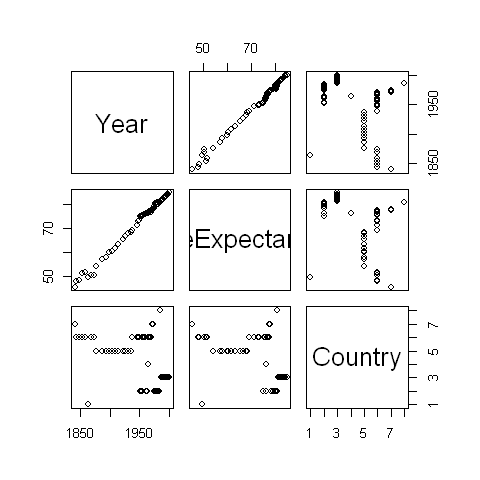

In [18]:
plot(mytable)

You can also get a lot of information about a table (any R object, really) by using `attributes()`

In [19]:
attributes(mytable)

$names
[1] "Year"           "LifeExpectancy" "Country"       

$class
[1] "data.frame"

$row.names
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74

## Plotting


Let's now plot the data in the table in a more intelligible way. Notice that each row has three pieces of information: `Life Expectancy`, `Year`, and `Country`. `LifeExpectancy` and `Year` are numerical values but `Country` is a *categorical* variable. R knows this, and immediately assigns integer numbers to each of the categories.

To see this, let's plot `LifeExpectancy` against `Country`.

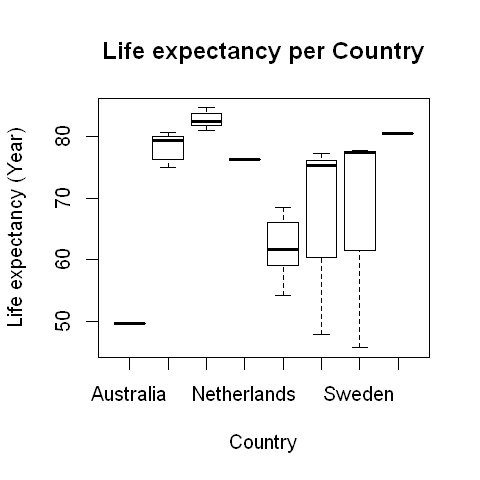

In [23]:
plot(mytable$Country, mytable$LifeExpectancy,main="Life expectancy per Country",xlab="Country", ylab="Life expectancy (Year)")

As you can see, `plot()` is very smart. It recognizes that in the `xx` axis there is a categorical variable and that for each of its values there are many numerical `yy` values. It then decides that the best kind of plot is a series of [box plots](https://en.wikipedia.org/wiki/Box_plot). You can force R to use different types of plot. More on that later.

<div class="alert alert-info">
    
To know more about any command you can always do `help(command)`. Or google...

</div>

R did not plot labels for all the countries. Let's fix that. First, the `levels()` function will return the unique categorical values, in the order that R uses them. We will use this for the labels.


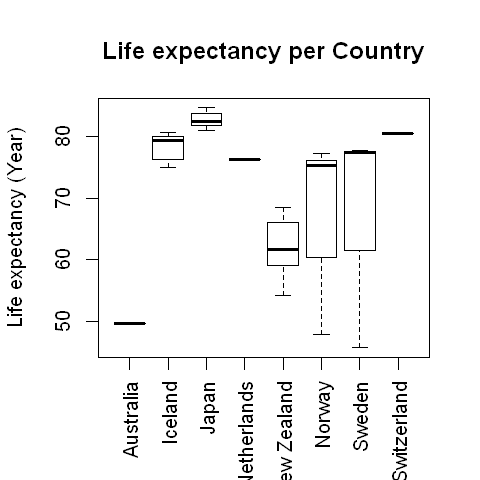

In [58]:
labs = levels(mytable$Country)
nlabs= nlevels(mytable$Country)

plot(mytable$Country, mytable$LifeExpectancy,xaxt="n",main="Life expectancy per Country",xlab="", ylab="Life expectancy (Year)")

axis(side=1, at=1:nlabs, labels=labs,las=2)

Obviously, howver and in spite of **R**\'s smarts, this is **not** the right graph to do with this data. This is because the data that it is using to build the box plots is life expectancies in different years. Clearly not a Good Choice (tm). 

The more obvious choice is to plot Life Expectancy as a function of the year in which it was measured.

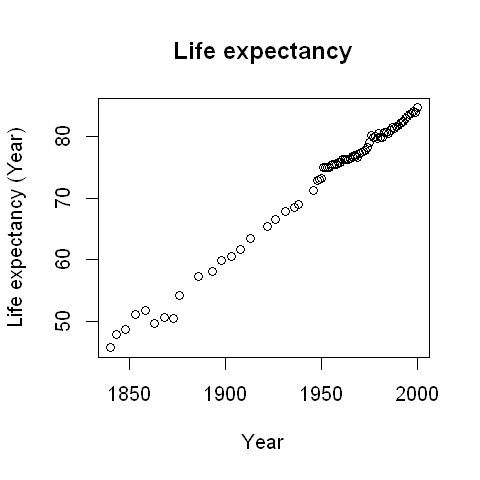

In [60]:
plot(mytable$Year, mytable$LifeExpectancy,main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)")


That seems more intelligible! However, it would be good to differentiate between countries. We know there are data for $8$ countries (as `nlevels(mytable)` will tell you). So, let's pick 8 colors and use them to color data points from the different countries:

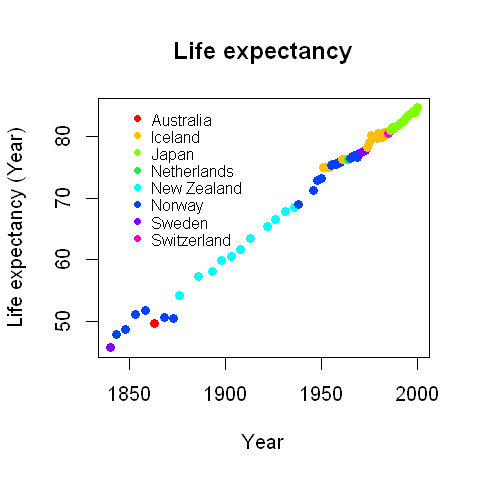

In [86]:
color = rainbow(8) # this chooses 8 colors from the rainbow

# color[mytable$Country]

plot(mytable$Year, mytable$LifeExpectancy,main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)",pch=16,col=color[mytable$Country])

legend(1850,85,legend=levels(mytable$Country),col=color,pch=16,box.lty=0,y.intersp = 2,x.intersp=2,cex=.8)

This one was a bit though. Let's break it down:

```
plot(mytable$Year, mytable$LifeExpectancy,main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)",pch=16,col=color[mytable$Country])
```

the parameters that we used were:

* `main`: sets the title of the plot
* `xlab` and `ylab` set the labels for the x and y axes
* `pch` (**p**rint **ch**aracter) sets the character that is used for each point. Numerical values are different symbols. Experiment with them.
* `col` (**col**ors) sets the color for each individual point. It should be a vector of the same size as the data, with the color of each datapoint

the `color` variable is a vector of 8 colors. `mytable$Country` has the countries, but **R** will interpret them also as numerical values from 1 to 8 (the levels). So, color[mytable$Country] will be a vector of the size of `mytable$Country` (the number of rows in the table) with a color at each entry corresponding to the color of the country.

In [ ]:


plot(mytable$Year, mytable$Life.Expectancy,t="b",main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)")

plot(mytable$Year, mytable$Life.Expectancy,t="p",main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)", cex=3,pch=16,col=color[mytable$Country],cex.lab=1.5, cex.axis=1.5,cex.main=2)

lines(mytable$Year, mytable$Life.Expectancy,lwd=2,lty=2)


plot(mytable$Year, mytable$Life.Expectancy,t="b",main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)")


mytable$Normalised.Life.Expectancy<-mytable$Life.Expectancy

mi<-min(mytable$Life.Expectancy)
ma<-max(mytable$Life.Expectancy)
range<-ma-mi

range<-max(mytable$Life.Expectancy)-min(mytable$Life.Expectancy)

mytable$Normalised.Life.Expectancy<-(mytable$Life.Expectancy-mi)/range


plot(mytable$Year, mytable$Normalised.Life.Expectancy,t="b",main="Life expectancy",xlab="Year", ylab="Life expectancy (Year)")


In [20]:
# writing to files

getwd()

help(write.table)
colnames(mytable)

write.table(mytable[,c(1,4,3)],"NormalisedLifeExpectancy_mine.txt",sep="\t",row.names=FALSE)





[1] "C:/Users/t.paixao/Documents/IGC/datasets/HumanLifeExpectancy"

[1] "Year"            "Life.Expectancy" "Country"

ERROR: Error in `[.data.frame`(mytable, , c(1, 4, 3)): undefined columns selected


install.packages("xlsx", repos='http://cran.us.r-project.org')

In [2]:
# Using Excel files
require(xlsx)

Loading required package: xlsx


In [9]:
#Using Excel files

read.xlsx("NormalisedLifeExpectancy.xlsx",sheetName = "Sheet 1")
#write.xlsx(mytable,"NormalisedLifeExpectancy.xlsx")

Year,Life.Expectancy,Country,Normalised.Life.Expectancy
1840,45.71,Sweden,0.00000000
1843,47.90,Norway,0.05628373
1848,48.64,Norway,0.07530198
1853,51.19,Norway,0.14083783
1858,51.73,Norway,0.15471601
1863,49.70,Australia,0.10254433
1868,50.65,Norway,0.12695965
1873,50.45,Norway,0.12181958
1876,54.22,New Zealand,0.21870984
1886,57.26,New Zealand,0.29683886


In [8]:
dir()

[1] "__MACOSX"                      "HumanLifeExpectancy.txt"      
[3] "LifeExpectancyPlot.R"          "NormalisedLifeExpectancy.txt" 
[5] "NormalisedLifeExpectancy.xlsx"

# basics of R programming

In [50]:
x<-1:6
assign("x",1:6)
x<-seq(from = 1,to = 6)

In [51]:
x[x>=5]

[1] 5 6

In [19]:
x!=5

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE

In [20]:
x

[1] 1 2 3 4 5 6

In [21]:
x[-2]

[1] 1 3 4 5 6

In [22]:
a=6:1
b=1:6

a+b

[1] 7 7 7 7 7 7

In [30]:
x = c(1,5,4,2,6,3)

sumario = summary(x)
mean(x)
# no mode

attributes(sumario)

[1] 3.5

$names
[1] "Min."    "1st Qu." "Median"  "Mean"    "3rd Qu." "Max."   

$class
[1] "summaryDefault" "table"

## matrices

In [26]:
M = matrix(1:20,4,5)
M

1,5,9,13,17
2,6,10,14,18
3,7,11,15,19
4,8,12,16,20


In [ ]:
## setting columns and rows

In [35]:
M[1,] = c(1:5)
M

1,2,3,4,5
2,6,10,14,18
3,7,11,15,19
4,8,12,16,20


In [37]:
summary(M)
summary(t(M))

       V1             V2             V3              V4              V5       
 Min.   :1.00   Min.   :2.00   Min.   : 3.00   Min.   : 4.00   Min.   : 5.00  
 1st Qu.:1.75   1st Qu.:5.00   1st Qu.: 8.25   1st Qu.:11.50   1st Qu.:14.75  
 Median :2.50   Median :6.50   Median :10.50   Median :14.50   Median :18.50  
 Mean   :2.50   Mean   :5.75   Mean   : 9.00   Mean   :12.25   Mean   :15.50  
 3rd Qu.:3.25   3rd Qu.:7.25   3rd Qu.:11.25   3rd Qu.:15.25   3rd Qu.:19.25  
 Max.   :4.00   Max.   :8.00   Max.   :12.00   Max.   :16.00   Max.   :20.00  

       V1          V2           V3           V4    
 Min.   :1   Min.   : 2   Min.   : 3   Min.   : 4  
 1st Qu.:2   1st Qu.: 6   1st Qu.: 7   1st Qu.: 8  
 Median :3   Median :10   Median :11   Median :12  
 Mean   :3   Mean   :10   Mean   :11   Mean   :12  
 3rd Qu.:4   3rd Qu.:14   3rd Qu.:15   3rd Qu.:16  
 Max.   :5   Max.   :18   Max.   :19   Max.   :20  

In [ ]:
## setting column and row names

In [40]:
colnames(M) = c("Col1","Col2","Col3","Col4","Col5")

In [41]:
M

Col1,Col2,Col3,Col4,Col5
1,2,3,4,5
2,6,10,14,18
3,7,11,15,19
4,8,12,16,20


In [43]:
M = rbind(M,c(1:5))
M

Col1,Col2,Col3,Col4,Col5
1,2,3,4,5
2,6,10,14,18
3,7,11,15,19
4,8,12,16,20
1,2,3,4,5
1,2,3,4,5


In [45]:
tail(M,1)

,Col1,Col2,Col3,Col4,Col5
"[6,]",1,2,3,4,5


In [48]:
nrow(M)
ncol

[1] 6

## lists